# Used Bike Price Prediction - Exploratory Data Analysis (EDA)

This notebook performs a thorough and reproducible EDA on the used bike dataset. It includes data loading, cleaning, feature engineering, visualization, and insights to support robust model development.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = '../bikes.csv'  # Adjust path if needed
df = pd.read_csv(file_path)
display(df.head())
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


Rows: 7857, Columns: 8


In [3]:
# Basic info and missing values
display(df.info())
display(df.describe(include='all'))
print('Missing values per column:')
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


None

,model_name,model_year,kms_driven,owner,location,mileage,power,price
count,7857,7857.000000,7857,7857,7838,7846,7826,7.857000e+03
unique,1724,NaN,1801,4,561,117,272,NaN
top,Royal Enfield Classic 350cc 2017,NaN,Mileage 65 Kmpl,first owner,delhi,\n\n 35 kmpl,19.80 bhp,NaN
freq,78,NaN,436,6817,1438,1071,922,NaN
mean,NaN,2015.367698,NaN,NaN,NaN,NaN,NaN,1.067913e+05
std,NaN,4.001443,NaN,NaN,NaN,NaN,NaN,1.389261e+05
min,NaN,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,4.200000e+04
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,7.500000e+04
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.250000e+05


Missing values per column:


model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [4]:
# Data cleaning and feature engineering
df = df.copy()

# Extract brand from model_name
if 'model_name' in df.columns:
    df['brand'] = df['model_name'].apply(lambda x: str(x).split()[0])

# Calculate bike age from model_year
if 'model_year' in df.columns:
    df['bike_age'] = 2025 - df['model_year']

# Convert numeric columns and handle missing values
for col in ['mileage', 'power', 'price']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values
df['brand'] = df['brand'].fillna('Unknown')
if 'owner' in df.columns:
    df['owner'] = df['owner'].fillna('Unknown')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Show cleaned data
display(df.head())
print('Missing values after cleaning:')
display(df.isnull().sum())

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,55.0,7.7,63500,Bajaj,8
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,55.0,7.7,115000,Royal,9
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,55.0,7.7,300000,Hyosung,13
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,55.0,7.7,100000,Bajaj,8
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,55.0,7.7,197500,Jawa,5


Missing values after cleaning:


model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage        0
power          0
price          0
brand          0
bike_age       0
dtype: int64

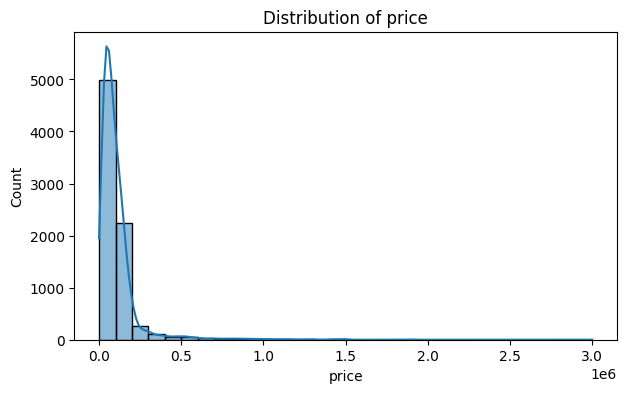

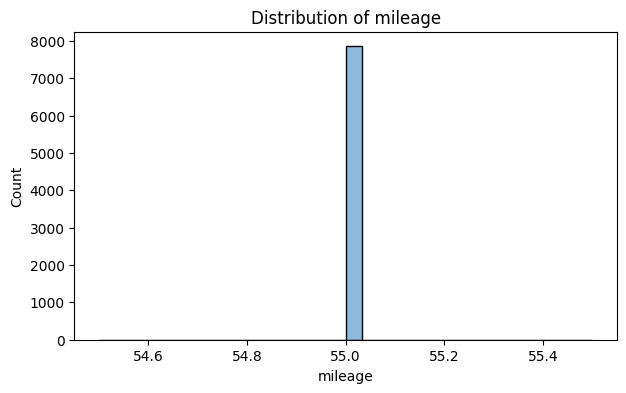

ValueError: Too many bins for data range. Cannot create 30 finite-sized bins.

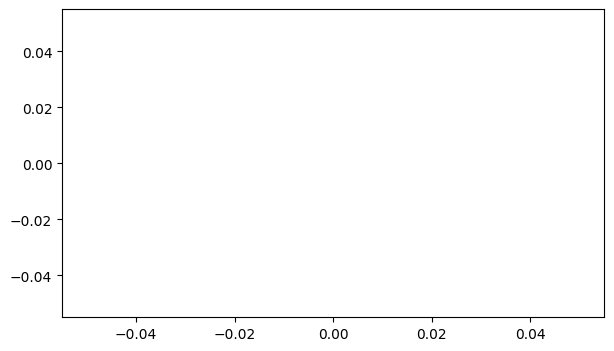

In [5]:
# Visualize distributions of key numerical features
num_cols = ['price', 'mileage', 'power', 'bike_age']
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(7, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()

In [ ]:
# Visualize categorical feature counts
cat_cols = ['brand', 'owner']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        df[col].value_counts().head(20).plot(kind='bar')
        plt.title(f'Top 20 {col} counts')
        plt.ylabel('Count')
        plt.show()

In [ ]:
# Boxplots for outlier detection
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(7, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [ ]:
# Pairwise scatterplots and correlation heatmap
sns.pairplot(df[num_cols])
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Price distribution by brand and owner
if 'brand' in df.columns:
    plt.figure(figsize=(14, 6))
    top_brands = df['brand'].value_counts().head(10).index
    sns.boxplot(x='brand', y='price', data=df[df['brand'].isin(top_brands)])
    plt.title('Price Distribution by Top Brands')
    plt.xticks(rotation=45)
    plt.show()

if 'owner' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='owner', y='price', data=df)
    plt.title('Price Distribution by Owner Type')
    plt.show()

## EDA Summary & Next Steps

- The dataset has been cleaned and key features engineered (brand, bike_age).
- Distributions, outliers, and correlations have been visualized for all major features.
- Price varies significantly by brand and owner type.
- Next steps: advanced feature engineering, encoding, and model training for price prediction.